# Ödev

## Giriş

In [1]:
# Google Drive'ı Colab'a bağla
from google.colab import drive
drive.mount('/content/drive')

# Uygun dosya yolunu gir
# Odevler dosyası, örn. 'yzm208/odevler/odev1/'
FOLDERNAME = 'yzm208/odevler/odev1/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Drive'ı bağladığımız için şu an Google Colab
# Python dosyalarını içinde açabilir
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Mounted at /content/drive


Ödevde Naive Bayes algoritması kullanılarak 3 adet model geliştirilecektir. Ödevin amacı; Naive Bayes'in teorik alt yapısını anlamak ve bununla ilgili uygulama yapmaktır. Ödevin teorik kısmı GitHub readme.md içerisinde açıklanacaktır. IMRAD (Giriş (Özet), Metot, Sonuçlar ve Yorum) formatı kullanılabilir. Algoritmanın teorik yapısı ve kullanılan hiper parametrelerin çalışma prensibi anlatılmalıdır. Repository'nin Readme.md dosyası okunarak çalışma tekrarlanabilir olmalıdır.

## Veri Seti

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv("/content/drive/MyDrive/yzm208/odevler/odev1/yzm208/datasets/diabetes.csv").copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: >

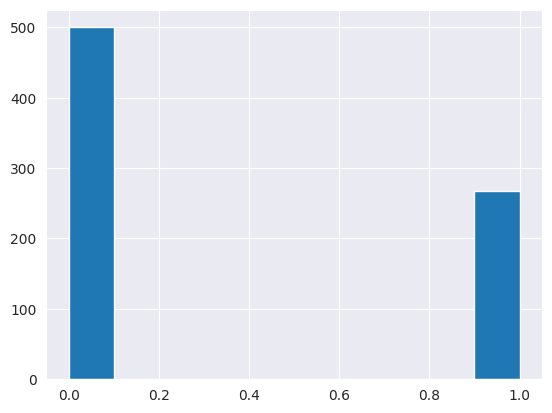

In [4]:
df['Outcome'].hist()

<Axes: >

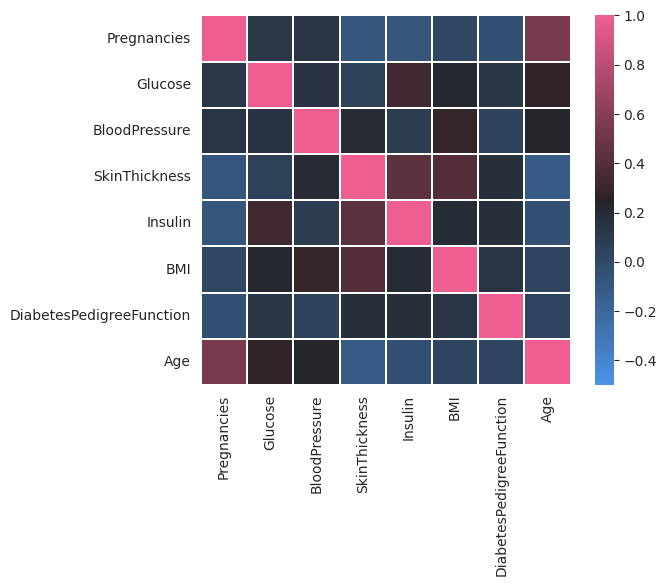

In [5]:
corr = df.iloc[:, :-1].corr(method='pearson')
cmap = sns.diverging_palette(250, 354, 80, 60, center='dark', as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=0.2)

In [6]:
data = df.copy()

In [7]:
X = data.drop(['Outcome'], axis = 1)
y = data["Outcome"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

## Birinci Model (Varsayılan Hiperparametreler ile Eğitim)

In [111]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [10]:
gnb = GaussianNB()

In [11]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [13]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)

Accuracy:  0.8311688311688312
              precision    recall  f1-score   support

           0       0.88      0.87      0.88        53
           1       0.72      0.75      0.73        24

    accuracy                           0.83        77
   macro avg       0.80      0.81      0.81        77
weighted avg       0.83      0.83      0.83        77



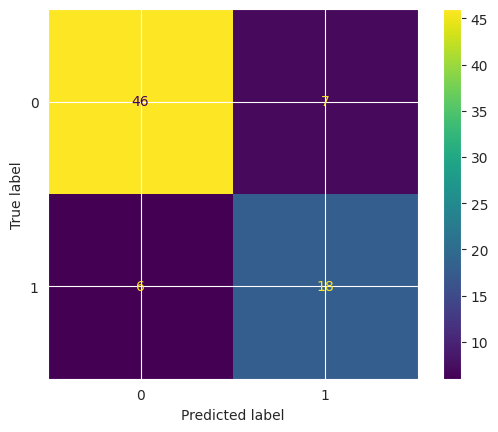

In [17]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

## İkinci Model (GridSearch, RandomSearch, Bayesian Optimization)

In [52]:
num_priors = 20

# Generate priors using a logarithmic range
test_priors = np.array([[i / (num_priors - 1), 1 - i / (num_priors - 1)] for i in range(num_priors)])

# Print the generated priors
print('Priors:')
print(test_priors)

Priors:
[[0.         1.        ]
 [0.05263158 0.94736842]
 [0.10526316 0.89473684]
 [0.15789474 0.84210526]
 [0.21052632 0.78947368]
 [0.26315789 0.73684211]
 [0.31578947 0.68421053]
 [0.36842105 0.63157895]
 [0.42105263 0.57894737]
 [0.47368421 0.52631579]
 [0.52631579 0.47368421]
 [0.57894737 0.42105263]
 [0.63157895 0.36842105]
 [0.68421053 0.31578947]
 [0.73684211 0.26315789]
 [0.78947368 0.21052632]
 [0.84210526 0.15789474]
 [0.89473684 0.10526316]
 [0.94736842 0.05263158]
 [1.         0.        ]]


In [55]:
param_grid_nb = {
    'priors': test_priors.tolist(),
    'var_smoothing': np.logspace(0,-9, num=200)
}

In [57]:
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 4000 candidates, totalling 40000 fits
GaussianNB(priors=[0.6842105263157895, 0.3157894736842105],
           var_smoothing=0.0007575250258771912)


In [58]:
priors = nbModel_grid.best_estimator_.priors
var_smoothing = nbModel_grid.best_estimator_.var_smoothing

In [59]:
gnb2 = GaussianNB(priors=priors, var_smoothing=var_smoothing)

In [60]:
y_pred2 = gnb2.fit(X_train, y_train).predict(X_test)

Accuracy:  0.8441558441558441
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        53
           1       0.73      0.79      0.76        24

    accuracy                           0.84        77
   macro avg       0.82      0.83      0.82        77
weighted avg       0.85      0.84      0.85        77



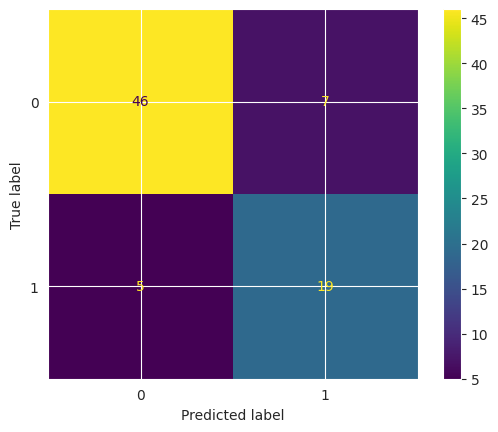

In [61]:
print("Accuracy: ", accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [69]:
nbModel_random = RandomizedSearchCV(
    estimator=GaussianNB(),
    param_distributions=param_grid_nb,
    n_iter=10,
    cv=10,
    verbose=1,
    n_jobs=-1
)
nbModel_random.fit(X_train, y_train)
print(nbModel_random.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
GaussianNB(priors=[0.5789473684210527, 0.42105263157894735],
           var_smoothing=2.049074689815846e-08)


In [70]:
priors2 = nbModel_random.best_estimator_.priors
var_smoothing2 = nbModel_random.best_estimator_.var_smoothing

In [71]:
gnb3 = GaussianNB(priors=priors2, var_smoothing=var_smoothing2)

In [72]:
y_pred3 = gnb3.fit(X_train, y_train).predict(X_test)

Accuracy:  0.8181818181818182
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        53
           1       0.67      0.83      0.74        24

    accuracy                           0.82        77
   macro avg       0.79      0.82      0.80        77
weighted avg       0.84      0.82      0.82        77



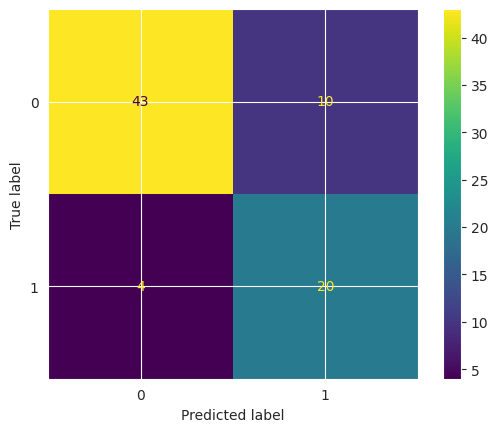

In [73]:
print("Accuracy: ", accuracy_score(y_test, y_pred3))
print(classification_report(y_test, y_pred3))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred3)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

## Üçüncü Model (Data Manipulation)

In [118]:
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)

In [113]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, y, test_size=0.10)

In [146]:
gnb4 = GaussianNB(priors=priors, var_smoothing=var_smoothing)

In [147]:
y_pred4 = gnb4.fit(X_train1, y_train1).predict(X_test1)

Accuracy:  0.7532467532467533
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        47
           1       0.72      0.60      0.65        30

    accuracy                           0.75        77
   macro avg       0.74      0.73      0.73        77
weighted avg       0.75      0.75      0.75        77



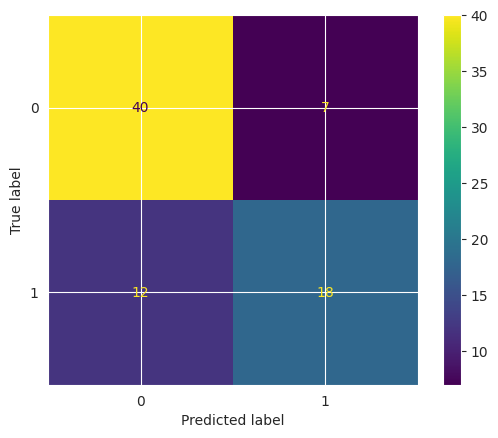

In [148]:
print("Accuracy: ", accuracy_score(y_test1, y_pred4))
print(classification_report(y_test1, y_pred4))
confusion_matrix = metrics.confusion_matrix(y_test1, y_pred4)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [119]:
min_max_scaler = MinMaxScaler()
X_scaled1 = min_max_scaler.fit_transform(X)

In [120]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled1, y, test_size=0.10)

In [121]:
gnb5 = GaussianNB(priors=priors, var_smoothing=var_smoothing)

In [122]:
y_pred5 = gnb5.fit(X_train2, y_train2).predict(X_test2)

Accuracy:  0.7402597402597403
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        49
           1       0.64      0.64      0.64        28

    accuracy                           0.74        77
   macro avg       0.72      0.72      0.72        77
weighted avg       0.74      0.74      0.74        77



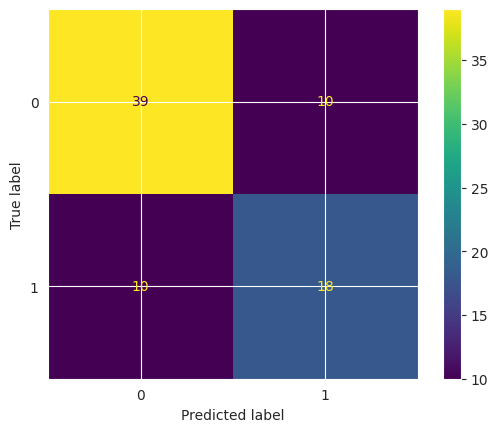

In [123]:
print("Accuracy: ", accuracy_score(y_test2, y_pred5))
print(classification_report(y_test2, y_pred5))
confusion_matrix = metrics.confusion_matrix(y_test2, y_pred5)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()